In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import yfinance  as yf

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
data = {'hyundai' : '005380.KS', 'kia' : '000270.KS', 'lg' : '051910.KS', 'samsung' : '006400.KS', 'sk' : '096770.KS', 'posco' : '003670.KS'}

data_raw = {}
for firm, code in data.items() : 
    data_raw[firm] = yf.download(code, start='2020-04-29', end='2021-05-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:label='7a79ac19-6f13-48bf-861e-68cda86cbe38', xlabel='Date'>

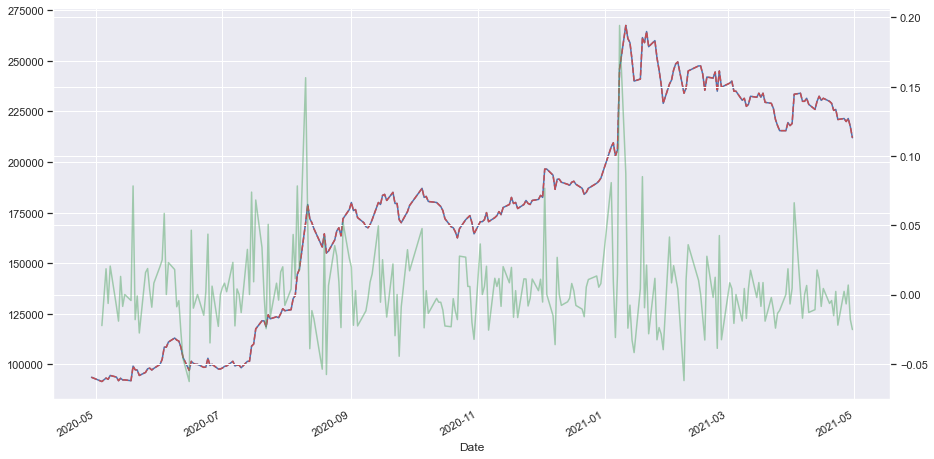

In [25]:
#주가 변동 그래프 - hyundai
plt.figure(figsize=(15,8))
ax=data_raw['hyundai']['Close'].plot()
data_raw['hyundai'].Close.plot(ax=ax, c='r', ls="--")
ax2 = ax.twinx()
data_raw['hyundai']["Close"].pct_change().dropna().plot(ax=ax2, c='g', alpha=0.5)

<AxesSubplot:label='deb79291-a856-4cdd-8f2c-f0be1272b92b', xlabel='Date'>

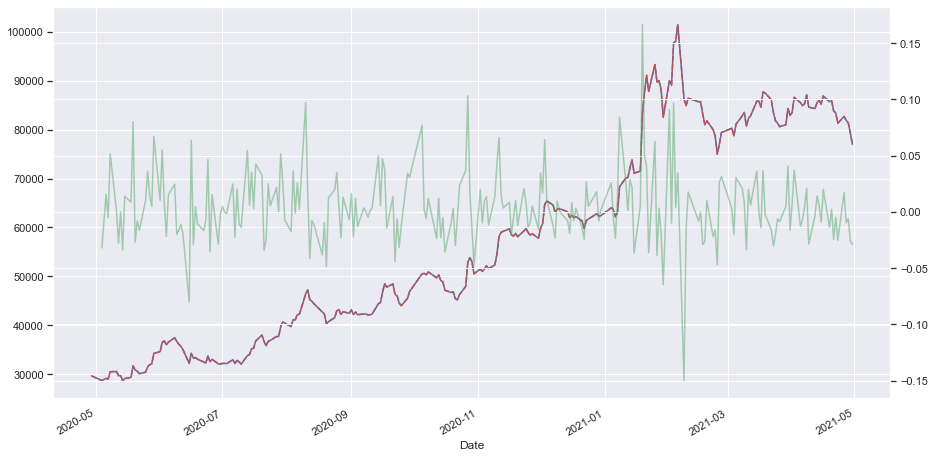

In [26]:
#주가 변동 그래프 - kia
plt.figure(figsize=(15,8))
ax=data_raw['kia']['Close'].plot()
data_raw['kia'].Close.plot(ax=ax, c='r', ls="--")
ax2 = ax.twinx()
data_raw['kia']["Close"].pct_change().dropna().plot(ax=ax2, c='g', alpha=0.5)

<AxesSubplot:label='f25ec66d-e9b5-49af-a765-f5d03959e403', xlabel='Date'>

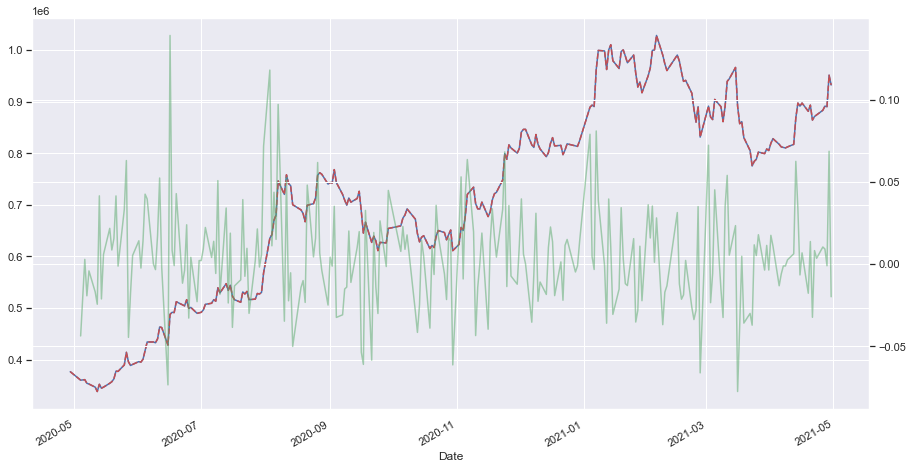

In [27]:
#주가 변동 그래프 - lg
plt.figure(figsize=(15,8))
ax=data_raw['lg']['Close'].plot()
data_raw['lg'].Close.plot(ax=ax, c='r', ls="--")
ax2 = ax.twinx()
data_raw['lg']["Close"].pct_change().dropna().plot(ax=ax2, c='g', alpha=0.5)

<AxesSubplot:label='81d3d68c-8ead-42fc-bb97-9a11f272ab56', xlabel='Date'>

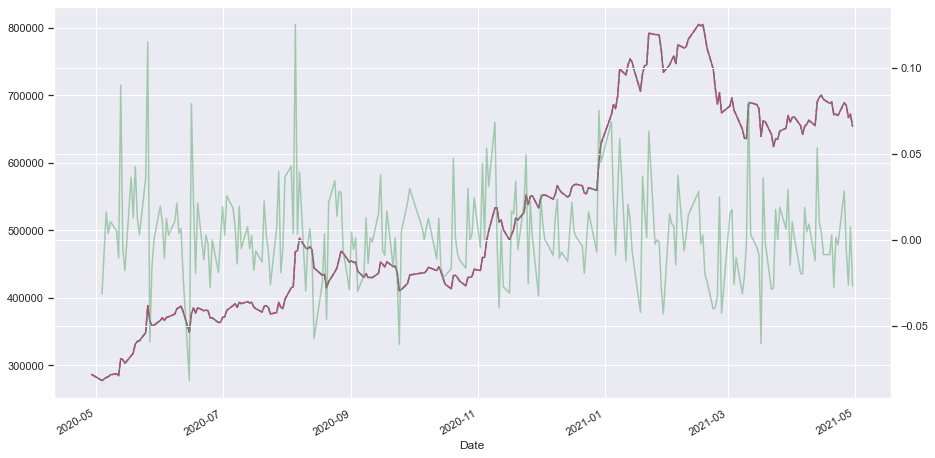

In [28]:
#주가 변동 그래프 - samsung
plt.figure(figsize=(15,8))
ax=data_raw['samsung']['Close'].plot()
data_raw['samsung'].Close.plot(ax=ax, c='r', ls="--")
ax2 = ax.twinx()
data_raw['samsung']["Close"].pct_change().dropna().plot(ax=ax2, c='g', alpha=0.5)

<AxesSubplot:label='44fa2b16-dd2b-4998-9513-82a2782bf2d1', xlabel='Date'>

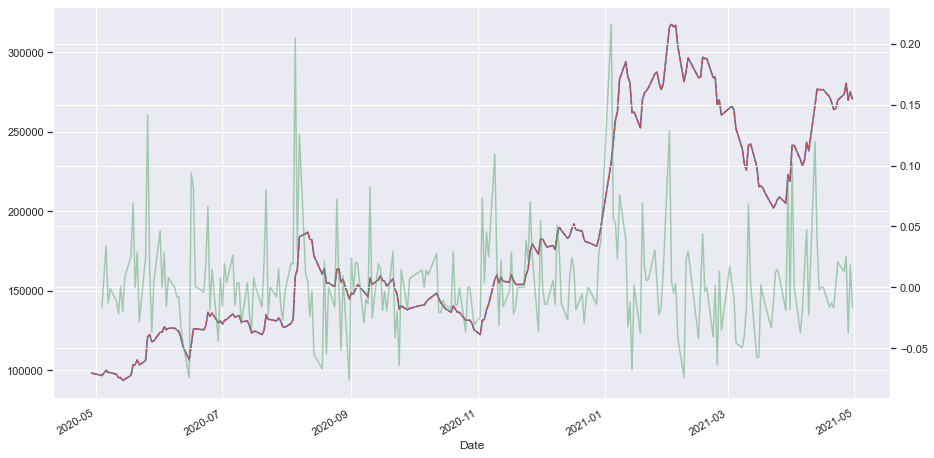

In [29]:
#주가 변동 그래프 - sk
plt.figure(figsize=(15,8))
ax=data_raw['sk']['Close'].plot()
data_raw['sk'].Close.plot(ax=ax, c='r', ls="--")
ax2 = ax.twinx()
data_raw['sk']["Close"].pct_change().dropna().plot(ax=ax2, c='g', alpha=0.5)

<AxesSubplot:label='6cc47690-2b81-4c52-990d-5a88cab3db96', xlabel='Date'>

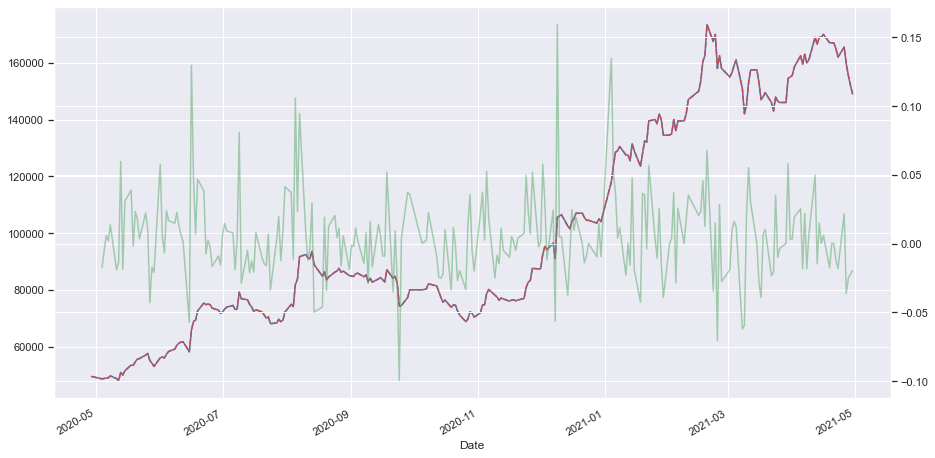

In [30]:
#주가 변동 그래프 - posco
plt.figure(figsize=(15,8))
ax=data_raw['posco']['Close'].plot()
data_raw['posco'].Close.plot(ax=ax, c='r', ls="--")
ax2 = ax.twinx()
data_raw['posco']["Close"].pct_change().dropna().plot(ax=ax2, c='g', alpha=0.5)

In [32]:
#주가 변동
from datetime import datetime

df_new = {}
for firm in data.keys() : 
    df_new[firm] = pd.DataFrame()
    df_new[firm]['Ret'] = data_raw[firm]["Close"].pct_change()
    df_new[firm]['Ret'] = np.sign(df_new[firm]['Ret'])
    df_new[firm].drop([datetime(2020, 4, 29)], axis=0, inplace=True)
df_new

{'hyundai':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07 -1.0
 2020-05-08  1.0
 2020-05-11 -1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27 -1.0
 2021-04-28  1.0
 2021-04-29 -1.0
 2021-04-30 -1.0
 
 [248 rows x 1 columns],
 'kia':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07 -1.0
 2020-05-08  1.0
 2020-05-11  1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27 -1.0
 2021-04-28 -1.0
 2021-04-29 -1.0
 2021-04-30 -1.0
 
 [248 rows x 1 columns],
 'lg':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07 -1.0
 2020-05-08 -1.0
 2020-05-11 -1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27  1.0
 2021-04-28 -1.0
 2021-04-29  1.0
 2021-04-30 -1.0
 
 [248 rows x 1 columns],
 'samsung':             Ret
 Date           
 2020-05-04 -1.0
 2020-05-06  1.0
 2020-05-07  1.0
 2020-05-08  1.0
 2020-05-11  1.0
 ...         ...
 2021-04-26  1.0
 2021-04-27 -1.0
 2021-04-28 -1.0
 2021-04-29  1.0
 2021-04-30 -1.0


In [14]:
#기업 별로 feature 불러오기
X = pd.read_csv("timeseries+sentiment.csv", sep=",")
X.index = X['date']
X.drop(['date'], axis=1, inplace=True)
X

,hyundai,kia,lg,samsung,sk,posco,news_num,search_vol,sentimental
date,,,,,,,,,
2020-05-04,0,0,1,1,0,0,10,20692,0.348374
2020-05-06,14,0,0,1,0,0,18,10583,0.126597
2020-05-07,5,0,6,1,0,0,14,4945,0.261125
2020-05-08,0,0,4,0,0,0,6,4789,0.622095
2020-05-11,16,1,1,0,0,0,26,17325,0.310098
...,...,...,...,...,...,...,...,...,...
2021-04-26,7,0,0,0,0,1,50,20640,0.300549
2021-04-27,1,1,1,5,0,0,46,6551,0.176617
2021-04-28,2,0,0,2,2,6,24,6317,0.308413


In [33]:
for firm in data.keys() :
    X[firm] = X.apply(lambda x: x[firm]/x['news_num'], axis=1)
X

,hyundai,kia,lg,samsung,sk,posco,news_num,search_vol,sentimental
date,,,,,,,,,
2020-05-04,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000,10,20692,0.348374
2020-05-06,0.777778,0.000000,0.000000,0.055556,0.000000,0.000000,18,10583,0.126597
2020-05-07,0.357143,0.000000,0.428571,0.071429,0.000000,0.000000,14,4945,0.261125
2020-05-08,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,6,4789,0.622095
2020-05-11,0.615385,0.038462,0.038462,0.000000,0.000000,0.000000,26,17325,0.310098
...,...,...,...,...,...,...,...,...,...
2021-04-26,0.140000,0.000000,0.000000,0.000000,0.000000,0.020000,50,20640,0.300549
2021-04-27,0.021739,0.021739,0.021739,0.108696,0.000000,0.000000,46,6551,0.176617
2021-04-28,0.083333,0.000000,0.000000,0.083333,0.083333,0.250000,24,6317,0.308413


In [34]:
data_time = {}
for firm in data.keys() :
    data_time[firm] = pd.DataFrame()
    data_time[firm] = X.loc[:, ['sentimental', 'news_num', 'search_vol', firm]]

data_time

{'hyundai':             sentimental  news_num  search_vol   hyundai
 date                                                   
 2020-05-04     0.348374        10       20692  0.000000
 2020-05-06     0.126597        18       10583  0.777778
 2020-05-07     0.261125        14        4945  0.357143
 2020-05-08     0.622095         6        4789  0.000000
 2020-05-11     0.310098        26       17325  0.615385
 ...                 ...       ...         ...       ...
 2021-04-26     0.300549        50       20640  0.140000
 2021-04-27     0.176617        46        6551  0.021739
 2021-04-28     0.308413        24        6317  0.083333
 2021-04-29     0.512079        36        6112  0.027778
 2021-04-30     0.140062        42        5800  0.047619
 
 [248 rows x 4 columns],
 'kia':             sentimental  news_num  search_vol       kia
 date                                                   
 2020-05-04     0.348374        10       20692  0.000000
 2020-05-06     0.126597        18       10

## scaling

In [35]:
for firm in data.keys() :
    print(data_time[firm].shape)

(248, 4)
(248, 4)
(248, 4)
(248, 4)
(248, 4)
(248, 4)


In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [37]:
for firm in data.keys() :
    data_time[firm]=scaler.fit_transform(data_time[firm])

## GridSearch 적용 전

In [38]:
xtrain = {}; xtest = {}; ytrain = {}; ytest = {} 

for firm in data.keys() :
    xtrain[firm], xtest[firm], ytrain[firm], ytest[firm] = train_test_split(data_time[firm], df_new[firm]['Ret'], random_state = 33)

In [39]:
forest_model = {}
for firm in data.keys() :
    forest_model[firm] = RandomForestClassifier()  # instantiation
    forest_model[firm].fit(xtrain[firm], ytrain[firm])  # fitting

In [40]:
for firm in data.keys() :
    print(firm, accuracy_score(ytest[firm], forest_model[firm].predict(xtest[firm])))

hyundai 0.43548387096774194
kia 0.5161290322580645
lg 0.41935483870967744
samsung 0.43548387096774194
sk 0.3709677419354839
posco 0.41935483870967744


## GridSearch 적용 후

In [41]:
from sklearn.model_selection import cross_val_score, GridSearchCV

forest_parameters = [{"n_estimators" : [2,4,6,8,10], "criterion" : ["gini","entropy"],
                      "min_samples_leaf":[2,4,6,8,10], "random_state":[1, 5, 10, 20, 30, 40]}]

In [43]:
best_forest_parameters = {}
for firm in data.keys() :
    forest_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = forest_parameters, scoring ="accuracy", cv=10, n_jobs=1)
    forest_grid_result = forest_grid.fit(xtrain[firm], ytrain[firm])
    best_forest_parameters[firm] = forest_grid_result.best_params_

    print(best_forest_parameters[firm]) ##{'criterion': 'entropy', 'min_samples_leaf': 10, 'n_estimators': 2, 'random_state': 1}

{'criterion': 'entropy', 'min_samples_leaf': 8, 'n_estimators': 6, 'random_state': 30}
c:\Users\OWNERS\Desktop\SOGANG\2021 8학기\금융빅데\BDvenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
{'criterion': 'gini', 'min_samples_leaf': 6, 'n_estimators': 4, 'random_state': 30}
c:\Users\OWNERS\Desktop\SOGANG\2021 8학기\금융빅데\BDvenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
{'criterion': 'gini', 'min_samples_leaf': 6, 'n_estimators': 8, 'random_state': 1}
c:\Users\OWNERS\Desktop\SOGANG\2021 8학기\금융빅데\BDvenv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), Use

In [44]:
forest_model = {}
for firm in data.keys() :
    forest_model[firm] = RandomForestClassifier(n_estimators = best_forest_parameters[firm]["n_estimators"], criterion = best_forest_parameters[firm]["criterion"],
                                     min_samples_leaf = best_forest_parameters[firm]["min_samples_leaf"], random_state = best_forest_parameters[firm]["random_state"])
    forest_model[firm].fit(xtrain[firm], ytrain[firm])

In [45]:
for firm in data.keys() :
    print(firm, accuracy_score(ytest[firm], forest_model[firm].predict(xtest[firm])))

hyundai 0.4032258064516129
kia 0.3870967741935484
lg 0.5161290322580645
samsung 0.41935483870967744
sk 0.41935483870967744
posco 0.46774193548387094


Text(0.5, 1.0, 'Feature Importance')

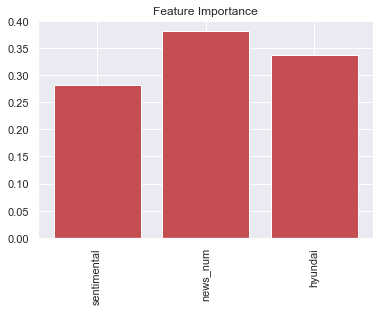

In [20]:
# plot feature importance - hyundai
feature_imp = forest_model['hyundai'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), xtrain['hyundai'].columns, rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

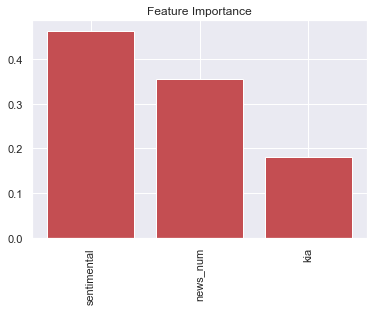

In [21]:
# plot feature importance - kia
feature_imp = forest_model['kia'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), xtrain['kia'].columns, rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

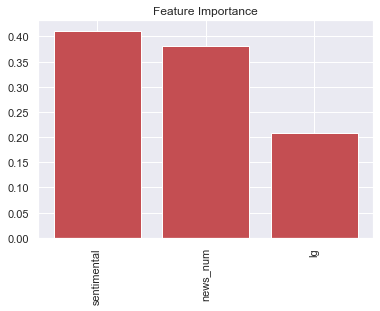

In [22]:
# plot feature importance - lg
feature_imp = forest_model['lg'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), xtrain['lg'].columns, rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

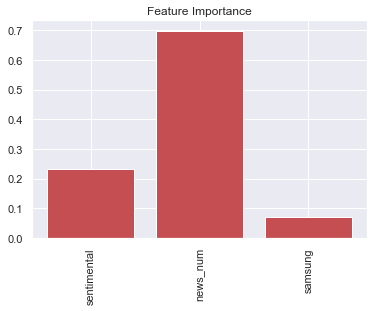

In [23]:
# plot feature importance - samsung
feature_imp = forest_model['samsung'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), xtrain['samsung'].columns, rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

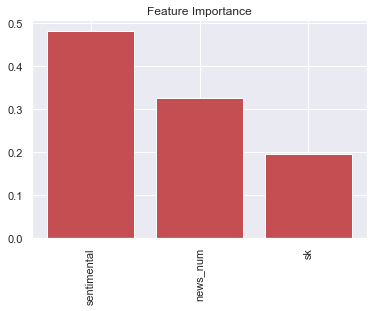

In [24]:
# plot feature importance - sk
feature_imp = forest_model['sk'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), xtrain['sk'].columns, rotation='vertical')
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

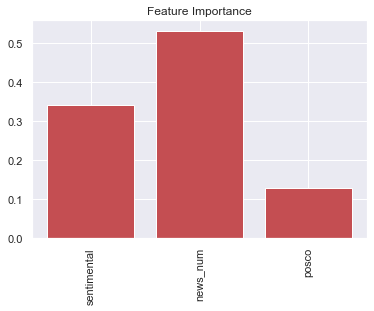

In [25]:
# plot feature importance - posco
feature_imp = forest_model['posco'].feature_importances_
plt.bar(range(len(feature_imp)), feature_imp, color='r')
plt.xticks(range(len(feature_imp)), xtrain['posco'].columns, rotation='vertical')
plt.title('Feature Importance')

---

In [26]:
# #feature 추가
# data_time_new = {}
# for firm in data.keys() :
#     df1 = data_raw[firm].loc[datetime(2020,11,3) : datetime(2021,5,3), ['Close', 'Volume']]
#     df2 = data_time[firm]
#     data_time_new[firm] = pd.concat([df1, df2],axis=1)
# data_time_new
